In [2]:
%pip install pandas matplotlib seaborn
%pip install --upgrade pip
import os
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-23.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
def join(arr, left, right, l, m, r):
    i = 0
    for i in range(m-l+1):
        arr[i] = left[i]
        i+=1
 
    for j in range(r-m):
        arr[i + j] = right[j]
 
 
# Function to store alternate elements in left
# and right subarray
def split(arr, left, right, l, m, r):
    for i in range(m-l+1):
        left[i] = arr[i * 2]
 
    for i in range(r-m):
        right[i] = arr[i * 2 + 1]
 
 
# Function to generate Worst Case of Merge Sort
def generateWorstCase(arr, l, r):
    if (l < r):
        m = l + (r - l) // 2
 
        # create two auxiliary arrays
        left = [0 for i in range(m - l + 1)]
        right = [0 for i in range(r-m)]
 
        # Store alternate array elements in left
        # and right subarray
        split(arr, left, right, l, m, r)
 
        # Recurse first and second halves
        generateWorstCase(left, l, m)
        generateWorstCase(right, m + 1, r)
        
        # join left and right subarray
        join(arr, left, right, l, m, r)
def swap(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp

def generateBestCaseQuick(arr,l,r):
        # Make Binary tree of the array
        # and insert elements accordingly
        if (l < r):
            m = l + (r - l) // 2
            generateBestCaseQuick(arr, l, m)
            generateBestCaseQuick(arr, m + 1, r)
            swap(arr, m, l + (r - m))

# Make Random Unsorted Array and write to file name "input.txt"
def make_random_array(size):
    import random
    with open("input.txt", "w") as f:
        # first line is the size of the array
        f.write(str(size) + "\n")
        # second line is the array that is not sorted 
        new_array = random.sample(range(1, size+1), size)
        f.write(" ".join(map(str, new_array)))

def make_sorted_array(size): 
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        # new_array = list(range(size,0,-1))
        new_array = range(1,size+1)
        
        f.write(" ".join(map(str, new_array)))
        
def make_revesed_array(size): 
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        # new_array = list(range(size,0,-1))
        new_array = range(size,0,-1)
        
        f.write(" ".join(map(str, new_array)))
        
def make_worst_merge_array(size):
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        new_array = list(range(1,size+1))
        generateWorstCase(new_array, 0, size-1)
        f.write(" ".join(map(str, new_array)))
        
def make_best_quick_array(size):
    with open("input.txt","w") as f: 
        f.write(str(size) + "\n")
        # second line is the array that is sorted reverse
        new_array = list(range(1,size+1))
        generateBestCaseQuick(new_array, 0, size-1)
        f.write(" ".join(map(str, new_array)))


In [ ]:

        
def testcase_generate(amount): 
    testcase = [1]
    while(testcase[-1]<amount):
        # check if the last element had first digit is 5 then *2 
        if(str(testcase[-1])[0] == '5'):
            testcase.append(testcase[-1]*2)
        else:
            testcase.append((int(str(testcase[-1])[0]) + 1) * 10**(len(str(testcase[-1]))-1))
    return testcase
def testcase_genby2pow(pow):
    testcase = [2**i for i in range(1,pow)]
    return testcase
def testcase_stepby(amount,stepby):
    testcase = [i for i in range(stepby,amount+stepby,stepby)]
    return testcase
# testcase = list(range(100000,10000000,100000))
# print(make_best_quick_array(20))

In [ ]:
testcase = list(range(0,10000,200)) +  list(range(10000,100000,500))
# push testcase 1 
testcase.insert(0,1)
program_lists = ["bubble.c","insertion.c","selection.c"]

def init_result_file():
    with open("result_temp.csv","w") as f:
        f.write("Program,Testcase,Iteration,Round,Time,Type\n")


def compile_program(program_name):
    # Compile the program using GCC
    os.system(f"gcc {program_name} -o {program_name.split('.')[0]}")
    
# init_result_file()
for program in program_lists: 
    # compile the program
    compile_program(program)
    # Run the program with each test case
for test in testcase:
    result = []
    print(f"Running {test} elements")
    # Random Run 2 Times
    for it in range(2):
        make_random_array(test)
        for round in range(5):
            for program in program_lists: 
                start = time.time()
                p = subprocess.Popen(f"./{program.split('.')[0]}",shell=True)
                p.wait()
                end = time.time()
                # Program,Testcase,Iteration,Time,Type
                result.append([program,test,0,round,end-start,"Sorted"])
            # Worst Case is reverse sorted array
        make_revesed_array(test)
        for round in range(5):
            for program in program_lists: 
                start = time.time()
                p = subprocess.Popen(f"./{program.split('.')[0]}",shell=True)
                p.wait()
                end = time.time()
                # Program,Testcase,Iteration,Time,Type
                result.append([program,test,0,round,end-start,"Reverse"])
        # Write result append to file
        with open("result_temp.csv","a") as f:
            for line in result:
                f.write(",".join(map(str,line))+"\n")


In [ ]:
print(result)
# read the result array and write to file name "result.csv"
with open("result.csv", "w") as f:
    f.write("Program,Testcase,Iteration,Run,Time,Type\n")
    for i in result:
        f.write(f"{','.join(map(str,i))}\n")

          Program  Testcase     Type  Iteration  Round         Time
0        bubble.c       200   Random        0.5    2.0     2.504730
1        bubble.c       200  Reverse        0.0    2.0     2.390766
2        bubble.c       200   Sorted        0.0    2.0     2.381563
3        bubble.c       400   Random        0.5    2.0     2.746797
4        bubble.c       400  Reverse        0.0    2.0     2.797079
...           ...       ...      ...        ...    ...          ...
1345  selection.c     59500  Reverse        0.0    2.0  2569.816732
1346  selection.c     59500   Sorted        0.0    2.0  2291.700745
1347  selection.c     60000   Random        0.5    2.0  2333.425403
1348  selection.c     60000  Reverse        0.0    2.0  2609.000826
1349  selection.c     60000   Sorted        0.0    2.0  2320.315981

[1350 rows x 6 columns]


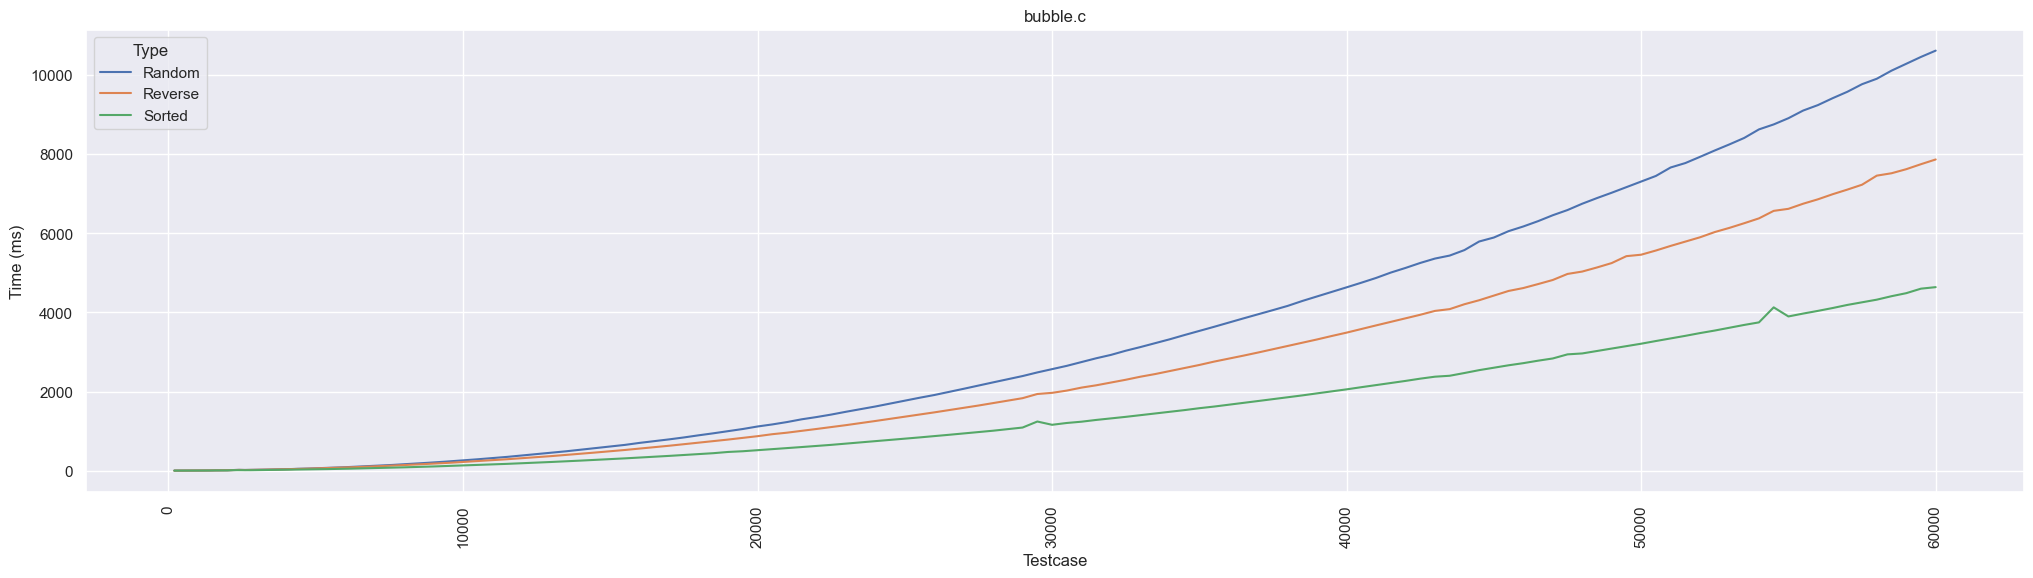

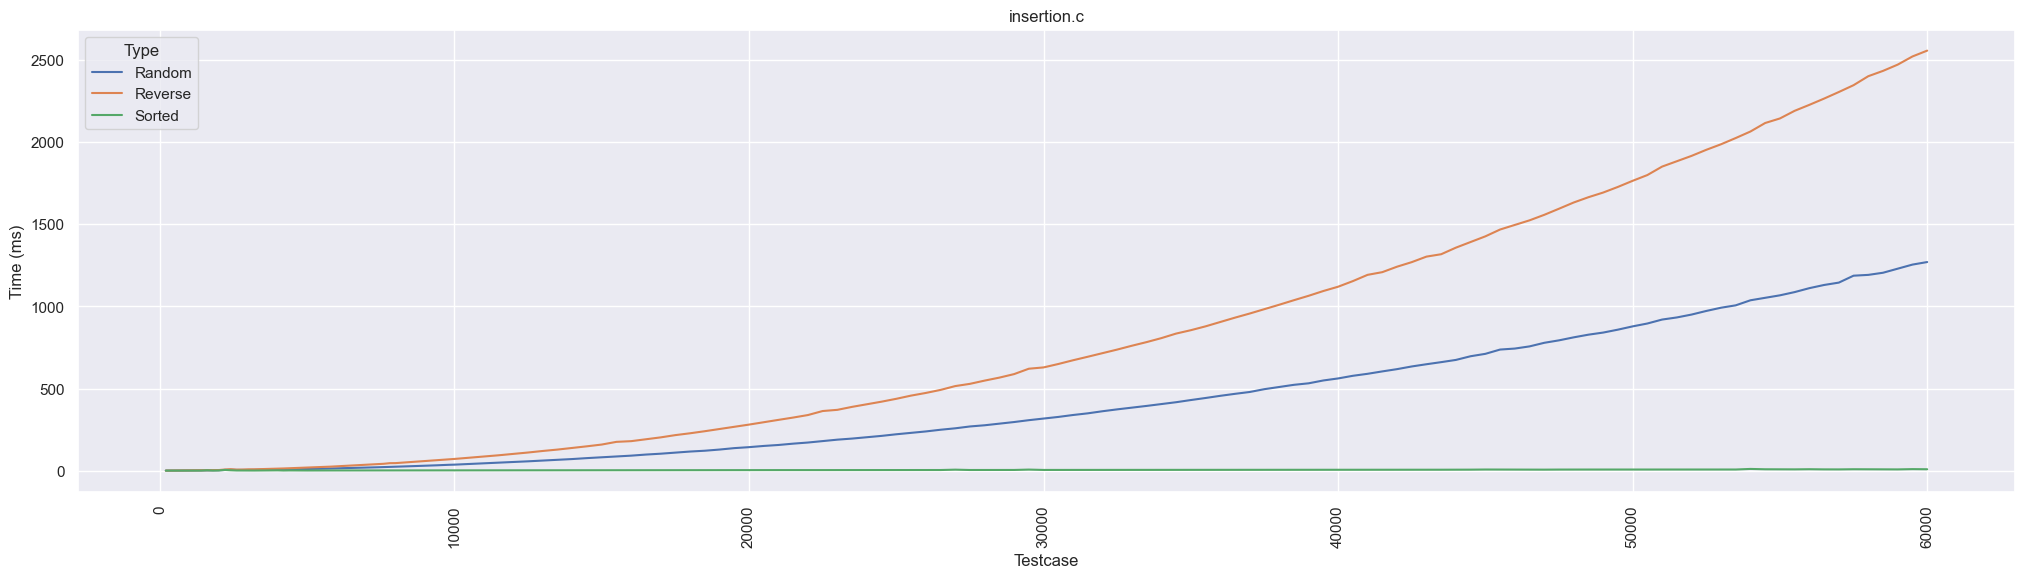

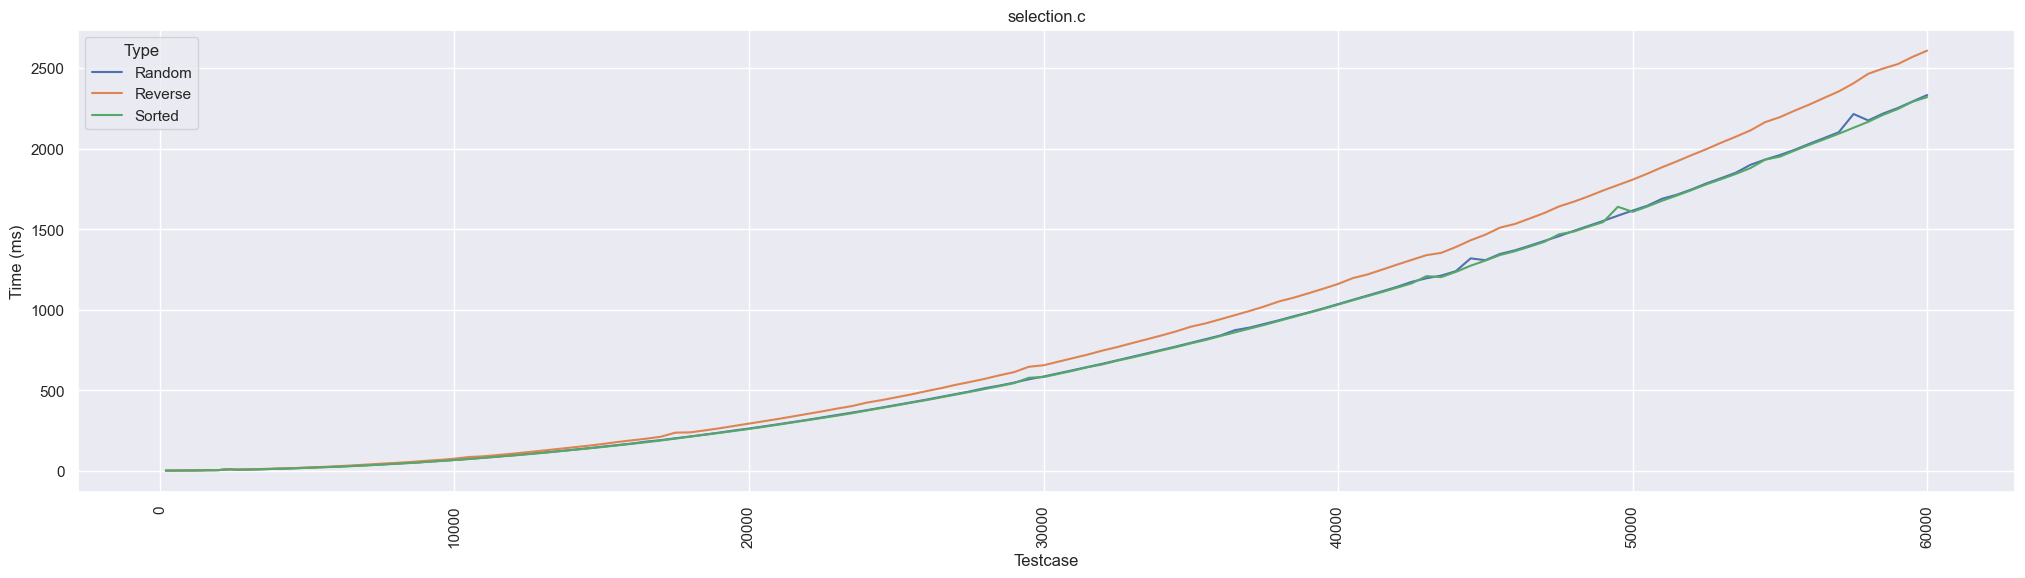

In [6]:
df = pd.read_csv("result_temp.csv", dtype={"Testcase": int, "Iteration": int, "Run": int, "Time": float})
program_lists = ["bubble.c","insertion.c","selection.c"]
df["Time"] = df["Time"] * 1000
# Limit testcase not more than 60000
df = df[df["Testcase"] <= 60000]
df = df[df["Testcase"] > 10]



# Group by program and testcase
df = df.groupby(["Program", "Testcase", "Type"]).mean().reset_index()


for program in program_lists:
    df_program = df[df["Program"] == program]
    # size of the figure 16 6
    plt.figure(figsize=(25,6))
    sns.set_theme(style="darkgrid")
    sns.lineplot(data=df_program, x="Testcase", y="Time", hue="Type")
    plt.title(program)
    # make test case to be the x axis 
    plt.xlabel("Testcase")
    plt.ylabel("Time (ms)")
    # x axis rotate 90 degree
    plt.xticks(rotation=90)
    plt.savefig(f"{program.split('.')[0]}.png")
    plt.show()
    

In [ ]:
df.to_csv("result_bubble.csv", index=False)